In [1]:
CUDA_LAUNCH_BLOCKING=1

In [1]:
import torch
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib

In [2]:
img = nib.load("/home/stefano/projects/augmentation_tesi/failed_processed/sub-OAS30009/ses-d0148/anat/sub-OAS30009_ses-d0148_run-01_T1w_processed.nii.gz")

In [3]:
data = img.get_fdata()
data.shape

(91, 109, 91)

(-0.5, 108.5, 90.5, -0.5)

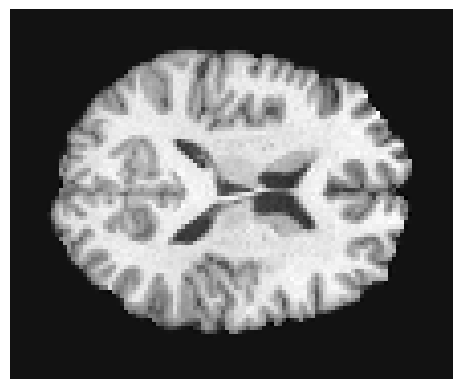

In [5]:
plt.imshow(data[:,:,45],cmap='gray')
plt.axis("off")

In [5]:
imgTensor = torch.tensor(data)

In [8]:
imgTensor.shape

torch.Size([91, 109, 91])

In [7]:
from pyraug.trainers.training_config import TrainingConfig
from pyraug.pipelines.training import TrainingPipeline

In [8]:
#Setting dei parametri di addestramento del modello generativo
config = TrainingConfig(
    output_dir='/home/stefano/projects/augmentation_tesi/testing/my_model',
    train_early_stopping=50,
    #no_cuda=False,
    learning_rate=1e-3,
    steps_saving=None,
    batch_size=200, # Set to 200 for demo purposes to speed up (default: 50)
    max_epochs=500 # Set to 500 for demo purposes. Augment this in your case to access to better generative model (default: 20000)
)

#Si crea e si applica la Pipeline sul dataset di training
torch.manual_seed(8)

#Creazione Pipeline
pipeline = TrainingPipeline(training_config=config)

In [9]:
#Applicazione Pipeline sui dati
pipeline(train_data=imgTensor, log_output_dir='/home/stefano/projects/augmentation_tesi/testing/output_logs')

Data normalized using individual_min_max_scaling.
 -> If this is not the desired behavior pass an instance of DataProcess with 'data_normalization_type' attribute set to desired normalization or None



../aten/src/ATen/native/cuda/Loss.cu:94: operator(): block: [17,0,0], thread: [64,0,0] Assertion `input_val >= zero && input_val <= one` failed.
../aten/src/ATen/native/cuda/Loss.cu:94: operator(): block: [17,0,0], thread: [65,0,0] Assertion `input_val >= zero && input_val <= one` failed.
../aten/src/ATen/native/cuda/Loss.cu:94: operator(): block: [17,0,0], thread: [66,0,0] Assertion `input_val >= zero && input_val <= one` failed.
../aten/src/ATen/native/cuda/Loss.cu:94: operator(): block: [17,0,0], thread: [67,0,0] Assertion `input_val >= zero && input_val <= one` failed.
../aten/src/ATen/native/cuda/Loss.cu:94: operator(): block: [17,0,0], thread: [68,0,0] Assertion `input_val >= zero && input_val <= one` failed.
../aten/src/ATen/native/cuda/Loss.cu:94: operator(): block: [17,0,0], thread: [69,0,0] Assertion `input_val >= zero && input_val <= one` failed.
../aten/src/ATen/native/cuda/Loss.cu:94: operator(): block: [17,0,0], thread: [70,0,0] Assertion `input_val >= zero && input_val <

ModelError: Error when calling forward method from model. Potential issues: 
 - Wrong model architecture -> check encoder, decoder and metric architecture if you provide yours 
 - The data input dimension provided is wrong -> when no encoder, decoder or metric provided, a network is built automatically but requires the shape of the flatten input data.
Exception raised: <class 'RuntimeError'> with message: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.
